<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl/blob/main/Opt_T6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Cargamos los datos usando gxp y pickle.

In [ ]:
import gzip, pickle
with gzip.open('mnist.pkl.gz','rb') as ff :
    u = pickle._Unpickler( ff )
    u.encoding = 'latin1'
    train, val, test = u.load()

In [ ]:
print( train[0].shape, train[1].shape )

(50000, 784) (50000,)


Tenemos 50000 arreglos de 784 entradas cada uno, el cual representa un número el cual se puede observar con el siguiente código:

clase:  5


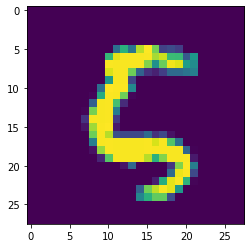

In [ ]:
idimg = 2000

im =  train[0][idimg].reshape(-1, 28) #train[0] es una matriz,
#train[0][5000] es un vector de longitud 784
#reshape(-1,28) significa crea una matriz de k x 28 tal que k*28=784
plt.imshow(im)#Plotealo como imagen.
print('clase: ', train[1][idimg])

train[1][k] guarda el número que representa el respectivo train[0][k].

------------------------------------------------

Implementación del descenso de gradiente.

Consideramos el tamaño de paso $\alpha_k=\frac{d_k^Td_k}{d_k^THd_k}$

In [ ]:
def get_alpha_k(x,d,H):#Si tenemos H la matriz Hessiana.
    top=np.linalg.norm(d)
    bottom=np.dot(d,np.dot(H,d))
    return (top/bottom)

Nuestra función de descenso recibe una condición inicial $x_0$, la función a minimizar, el gradiente y Hessiano de la misma, y hay parámetros opcionales para tolerancia del gradiente y número máximo de iteraciones, así como un parámetro (False por default) que grafica el valor de $f(x_k)$ y $||g_k||$.

In [ ]:
def Steepest_descent(x_0,f,grad_f,Hessian_f,tol_grad=10**(-6),max_iter=10**5,pr="False"):
    alpha_k=get_alpha_k(x=x_0,d=grad_f(x_0),H=Hessian_f(x_0))
    x_1=x_0-alpha_k*np.array(grad_f(x_0))#First iteration
    if(pr=='True'):
        print("Initial approximation: ", x_0)
        F=[f(x_0)]
        G=[np.linalg.norm(grad_f(x_0))]
    x_0=x_1
    k=1
    norm_grad=np.linalg.norm(grad_f(x_1))
    #Cycle
    while(norm_grad>tol_grad and k<max_iter):#stop criteria
        k+=1
        alpha_k=get_alpha_k(x=x_0,d=grad_f(x_0),H=Hessian_f(x_0))
        x_1=x_0-alpha_k*np.array(grad_f(x_0))
        x_0=x_1
        norm_grad=np.linalg.norm(grad_f(x_1))
        if(pr=='True'):
            F.append(f(x_0))
            G.append(np.linalg.norm(grad_f(x_0)))
    if(k==max_iter):
        print("There wasnt convergence after "+str(max_iter)+" iterations.\nLast iteration: "+str(x_1),"   ","f(x_k)= ",str(f(x_1)))
    else:
        L=0
        plt.plot(range(L+1,len(F)),F[L:-1])#Posterior convergence
        plt.title("k vs. F(X_k)")   
        plt.show()         
        plt.plot(range(L+1,len(G)),G[L:-1])
        plt.title("k vs. ||g(X_k)||")   
        plt.show()
    print("iterations: ",k)
    return (x_1)

Definimos $f$, $\nabla f$ y $H_f$ para el problema.

Primero seleccionamos un subconjunto de los datos, tales que $y\in\{0,1\}$.

In [131]:
import random

In [249]:
y=train[1][train[1]<2]
x=train[0][train[1]<2]
np.random.seed(0)
u=np.random.randint(0,5000,200)
x=x[u]
np.random.seed(0)
y=y[np.random.randint(0,5000,200)]
n=len(x)

In [250]:
x_plus=np.c_[x,np.ones(n)]
x_plus.shape

(200, 785)

In [228]:
def pi_i(i,b,b_0):
    u=np.dot(x[i],b)
    a=1+np.exp(-u-b_0)
    return (1/a)

In [229]:
def h(b_and_b_0):
    b=b_and_b_0[0:-1]
    b_0=b_and_b_0[-1]
    suma=0
    for i in range(n):
        p_i=pi_i(i=i,b=b,b_0=b_0)
        suma+=y[i]*np.log(p_i)+(1-y[i])*np.log(1-p_i)
    return suma

In [265]:
def grad_h(b_and_b_0):
    b=b_and_b_0[:-1]
    b_0=b_and_b_0[-1]
    suma_g=np.zeros(len(b_and_b_0))
    for i in range(n):
        p_i=pi_i(i=i,b=b,b_0=b_0)
        suma_g+=((y[i]/p_i)-(1-y[i])*(1/(1-p_i)))*(-((p_i**(-1)-1)*p_i**2))*x_plus[i]
    return suma_g

In [231]:
def Hessian_h(b_and_b_0):
    b=b_and_b_0[:-1]
    b_0=b_and_b_0[-1]
    suma_h=np.zeros((len(b_and_b_0),len(b_and_b_0)))
    for i in range(n):
        p_i=pi_i(i=i,b=b,b_0=b_0)
        common_exp=p_i**(-1)-1
        suma_h+=np.outer(x_plus[i],x_plus[i])*(common_exp*(-(common_exp+1)**2+2*(common_exp+1)))*p_i**4
    return suma_h

Initial approximation:  [0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009
 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009
 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009
 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009
 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009
 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009
 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009
 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009
 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009
 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009
 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009
 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009
 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009
 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0009 0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


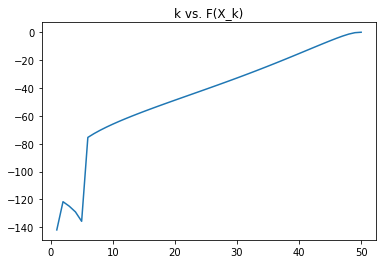

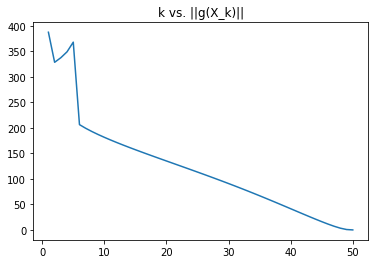

iterations:  51


In [277]:
loc_min=Steepest_descent(x_0=np.ones(785)*0.0009,f=h,grad_f=grad_h,Hessian_f=Hessian_h,tol_grad=0.001,max_iter=1000,pr='True')

In [158]:
#Guardar la solucion
fo = open(f"b_0.txt", "w")
fo.write(str(785)+"\n")#Add size
np.savetxt(fo, loc_min, fmt='%1.9e', comments='')
fo.close()

In [276]:
h(np.ones(785)*0.0009)

-141.93015066230865

In [246]:
from scipy.optimize import minimize
minimize(h,np.ones(785)*-2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in 

      fun: nan
 hess_inv: array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])
      jac: array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, n

In [267]:
grad_h(np.array(loc_min))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [247]:
loc_min=[  -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -7.08593411,  -24.65552465,  -52.0270973 ,  -66.73007044,
        -29.18662958,  -39.3584978 ,  -49.16047989,  -22.71362254,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -3.47954447,  -25.58023995,
        -31.03606017,  -29.00168653,  -68.76444408,  -72.09341913,
        -62.93873774,  -45.36914719,  -66.08276973,  -44.25948884,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -7.45582022,  -26.41248371,
        -42.68747285,  -60.62694951,  -73.75790666,  -72.83319136,
        -77.82665394,  -59.14740504,  -67.37737114,  -35.75210816,
         -3.01718682,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.6473007 ,  -21.60396419,
        -43.51971661,  -56.74314528,  -97.43061813,  -73.5729636 ,
        -83.09753111,  -73.38802054,  -65.15805444,  -11.70951057,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,  -10.32243763,
        -41.02298532,  -52.39698341, -109.17450234,  -86.61144921,
        -79.76855605,  -78.75136923,  -48.14329307,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.46235765,
        -10.2299661 ,  -65.80535515, -116.38728162, -135.99124581,
        -91.14255415,  -72.18589066,  -16.98038773,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -6.06874728,
        -23.45339477,  -67.19242808, -126.55914983, -138.21056251,
       -100.75959318,  -49.43789448,   -3.94190211,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -5.14403199,
        -33.25537687,  -70.70634619, -148.10501613, -169.09605326,
       -101.68430847,  -22.8985656 ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
        -21.14160654, -101.77678   , -171.03795537, -169.92829702,
        -68.67197255,   -5.7913327 ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
        -33.44031993, -140.98470838, -186.85058686, -165.67460668,
        -35.5671651 ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
        -50.27013824, -165.21224903, -189.16237509, -129.88812488,
        -16.98038773,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -4.40425976,
        -76.439581  , -173.81210125, -186.57317228, -126.83656441,
         -9.95255151,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,  -16.33308703,
       -114.63032256, -176.40130406, -170.39065467,  -92.62209861,
        -10.41490916,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.36988612,  -37.69401027,
       -124.33983313, -170.29818314, -134.04934369,  -73.01813442,
         -8.47300704,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -9.02783622,  -64.60322527,
       -126.92903594, -160.95855869, -109.26697387,  -70.33646008,
        -21.3265496 ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -3.84943058,  -26.04259759,  -86.42650616,
       -116.6646962 , -140.42987921,  -82.08034428,  -72.18589066,
        -41.48534297,  -11.98692515,   -2.36988612,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,  -11.89445362,  -41.85522908,  -99.37252024,
       -104.73586894, -115.18515174,  -78.47395465,  -66.26771279,
        -45.09173261,  -26.13506912,   -4.31178823,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,  -20.49430584,  -55.07865776, -101.03700777,
        -94.93388684,  -95.1188299 ,  -76.71699559,  -64.32581068,
        -46.6637486 ,  -26.41248371,   -4.31178823,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -9.12030775,  -26.04259759,  -69.50421631,  -98.07791883,
        -87.25874992,  -66.26771279,  -57.1130314 ,  -64.32581068,
        -40.6530992 ,  -25.39529689,   -4.31178823,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -6.4386334 ,  -27.61461359,  -68.30208643,  -83.74483181,
        -71.07623231,  -51.28732506,  -53.22922717,  -58.77751893,
        -36.12199427,   -9.21277928,   -2.73977223,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -7.27087716,  -24.47058159,  -15.40837173,
         -2.        ,   -4.86661741,  -15.77825785,  -19.75453361,
         -7.17840563,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
       -191.38169179]

In [252]:
minimize(h,np.ones(785)*-2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in 

      fun: nan
 hess_inv: array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])
      jac: array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, n

In [254]:
loc_min=[  -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.6429043 ,   -3.53467478,   -3.76280211,
         -2.38021222,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.85720573,   -6.52106894,
        -14.91338959,  -18.73625064,  -24.12143826,  -34.14521498,
        -28.0963842 ,  -33.49539773,  -35.89419119,  -25.01320874,
        -16.24067588,  -11.00757314,   -4.68222439,   -2.44242877,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -4.11536253,  -14.7751306 ,
        -23.87257208,  -32.76953803,  -47.819029  ,  -70.09255215,
        -67.90806012,  -68.00484142,  -61.92144589,  -39.30918822,
        -25.22059723,  -16.05402625,   -7.6755315 ,   -3.14063666,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.13134604,   -2.24886618,   -5.24908624,  -14.49861262,
        -28.37981513,  -40.96138314,  -65.76504579,  -84.31248919,
        -94.91695365,  -81.92060867,  -66.56694793,  -40.47747668,
        -25.40724686,  -13.4616702 ,   -7.7723128 ,   -2.66364315,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.26960503,   -3.41715464,   -5.05552366,  -12.79802705,
        -30.0804007 ,  -46.46409091,  -75.90634265,  -93.98370548,
       -109.99409642,  -87.98326535,  -60.67711499,  -38.61789327,
        -20.4783139 ,  -11.80947528,   -5.26291214,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.47699351,   -3.52776183,   -4.60618195,  -12.11364506,
        -27.81295327,  -49.31222608,  -88.23904448, -110.80982446,
       -115.9876236 ,  -83.20641727,  -53.63973245,  -32.36167402,
        -15.79133417,   -8.65717033,   -2.33182157,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.17973669,   -4.27436037,   -9.30007463,
        -23.32644908,  -54.60754537, -103.8553973 , -133.93364039,
       -122.72774932,  -76.81885197,  -44.18281759,  -23.24349368,
        -10.47527603,   -2.38021222,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.37329927,   -5.8435999 ,   -8.80234227,
        -24.57769293,  -63.85707174, -125.07815214, -151.6860946 ,
       -115.78714807,  -65.03227315,  -31.40077404,  -14.38800543,
         -3.89414815,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.92633523,   -4.88269992,   -7.56492431,
        -25.35194327,  -77.32349729, -151.16071044, -163.98423168,
       -102.94288797,  -49.80995845,  -22.02681458,   -8.67099623,
         -2.13825899,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.20047553,   -3.56923953,   -4.18449203,   -8.18708976,
        -29.48588704, -103.30927429, -171.58847608, -163.50723817,
        -89.21377035,  -35.77667105,  -10.62736092,   -3.49319708,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.45625466,   -3.83884456,   -5.42882293,  -11.22878753,
        -39.26771052, -131.50719513, -182.13763695, -156.92611028,
        -67.77671408,  -23.72048719,   -6.36207111,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.51155826,   -5.83668695,  -19.62802112,
        -61.94218474, -154.66557581, -184.88207789, -140.61154957,
        -45.26815065,  -11.29100407,   -2.06912949,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.0276518 ,   -7.28840633,  -26.96957344,
        -82.50820938, -162.87124682, -182.10307221, -120.39808535,
        -31.50446828,   -6.5003301 ,   -2.02073885,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.26269208,   -5.8574258 ,  -16.99418737,  -44.91559023,
       -103.01893042, -164.58565828, -167.80017978,  -92.37298825,
        -22.94623686,   -4.05314599,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.11060719,   -2.        ,   -2.56686186,
         -4.72370209,  -12.45237958,  -28.26920794,  -62.11500848,
       -113.66487258, -157.05745632, -138.75887911,  -74.15736643,
        -18.57033985,   -4.84122223,   -2.11752014,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.43551582,   -2.53921006,   -5.02095891,
         -7.92439768,  -20.13957938,  -42.71035935,  -73.57667868,
       -116.75496099, -138.97318054, -118.531589  ,  -68.35740184,
        -21.59129876,   -4.92417762,   -3.2166791 ,   -2.43551582,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -4.39188051,   -7.7584869 ,
        -14.37417953,  -32.29945747,  -54.09598711,  -83.07507123,
       -112.66940786, -123.48126081,  -98.80203125,  -64.49306309,
        -28.44203167,   -8.69173507,   -5.51177832,   -3.69367262,
         -3.25124385,   -2.06912949,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.88485753,   -7.37827468,  -10.41305949,
        -21.21108654,  -40.29773999,  -61.70023151,  -87.72748622,
       -101.64325348, -109.87657628,  -86.05455245,  -61.45136533,
        -32.49993301,  -11.89243067,   -5.58090782,   -3.74897621,
         -3.74897621,   -2.16591079,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -3.32037335,   -4.68222439,   -9.23785808,  -15.3903831 ,
        -29.50662589,  -44.34181543,  -65.97934723,  -83.38615396,
        -89.98110774,  -96.71432051,  -77.16449945,  -57.25520501,
        -35.43102357,  -15.88811546,   -6.4035488 ,   -3.81119276,
         -3.09224601,   -2.0138259 ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -3.76280211,   -5.13847905,  -10.9453566 ,  -17.20848881,
        -30.48135176,  -46.98947507,  -62.61965379,  -72.76786359,
        -80.77305906,  -78.33278791,  -66.43560189,  -52.40231449,
        -34.62220849,  -16.35819602,   -7.39901353,   -3.8595834 ,
         -2.54612301,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -3.76280211,   -5.35969344,   -8.81616816,  -14.57465506,
        -27.4949576 ,  -40.90607954,  -48.5172369 ,  -57.52481004,
        -63.93311419,  -56.62612661,  -48.89053617,  -43.74038882,
        -30.6403496 ,   -8.72629982,   -4.13610138,   -2.84337983,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.94016113,   -3.74897621,
         -5.145392  ,   -9.18255449,  -15.06547447,  -16.68310465,
        -14.93412843,  -18.5219492 ,  -19.81467075,  -14.24283349,
         -9.83928468,   -3.98401649,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.0414777 ,   -3.38950284,   -3.16828846,   -2.03456475,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
         -2.        ,   -2.        ,   -2.        ,   -2.        ,
       -187.82008141]